In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy

import matplotlib.pyplot as plt
from sklearn.cluster import k_means

In [2]:
import sys

sys.path.append("../src")

In [3]:
from core import SITE_NAMES
from calls import plot_call_features, compute_features

In [4]:
site_key = 'Carp'
location_call_signals = np.load(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_infile_call_signals.npy', allow_pickle=True)

location_calls_sampled = pd.read_csv(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_infile_call_signals.csv', index_col=0, low_memory=False)
location_calls_sampled['index'] = location_calls_sampled.index
location_calls_sampled

,index,SD_card,file_name,site,SNR,sampling_rate
0,0,8,20220713_043000.WAV,Carp Pond,20.382066,250000
1,1,8,20220713_050000.WAV,Carp Pond,23.412185,250000
2,2,8,20220713_050000.WAV,Carp Pond,23.485646,250000
3,3,8,20220713_050000.WAV,Carp Pond,20.060314,250000
4,4,8,20220713_050000.WAV,Carp Pond,5.586934,250000
...,...,...,...,...,...,...
3870,3870,10,20221017_113000.WAV,Carp Pond,24.952015,192000
3871,3871,10,20221017_120000.WAV,Carp Pond,5.512149,192000
3872,3872,10,20221017_133000.WAV,Carp Pond,30.065039,192000
3873,3873,10,20221017_133000.WAV,Carp Pond,19.299822,192000


In [5]:
snr_thresh = 4
good_snr_location_calls_sampled = location_calls_sampled.loc[location_calls_sampled['SNR']>=snr_thresh].copy()
good_snr_location_calls_sampled.set_index(keys=np.arange(len(good_snr_location_calls_sampled)), inplace=True)
good_snr_location_calls_sampled

,index,SD_card,file_name,site,SNR,sampling_rate
0,0,8,20220713_043000.WAV,Carp Pond,20.382066,250000
1,1,8,20220713_050000.WAV,Carp Pond,23.412185,250000
2,2,8,20220713_050000.WAV,Carp Pond,23.485646,250000
3,3,8,20220713_050000.WAV,Carp Pond,20.060314,250000
4,4,8,20220713_050000.WAV,Carp Pond,5.586934,250000
...,...,...,...,...,...,...
3753,3870,10,20221017_113000.WAV,Carp Pond,24.952015,192000
3754,3871,10,20221017_120000.WAV,Carp Pond,5.512149,192000
3755,3872,10,20221017_133000.WAV,Carp Pond,30.065039,192000
3756,3873,10,20221017_133000.WAV,Carp Pond,19.299822,192000


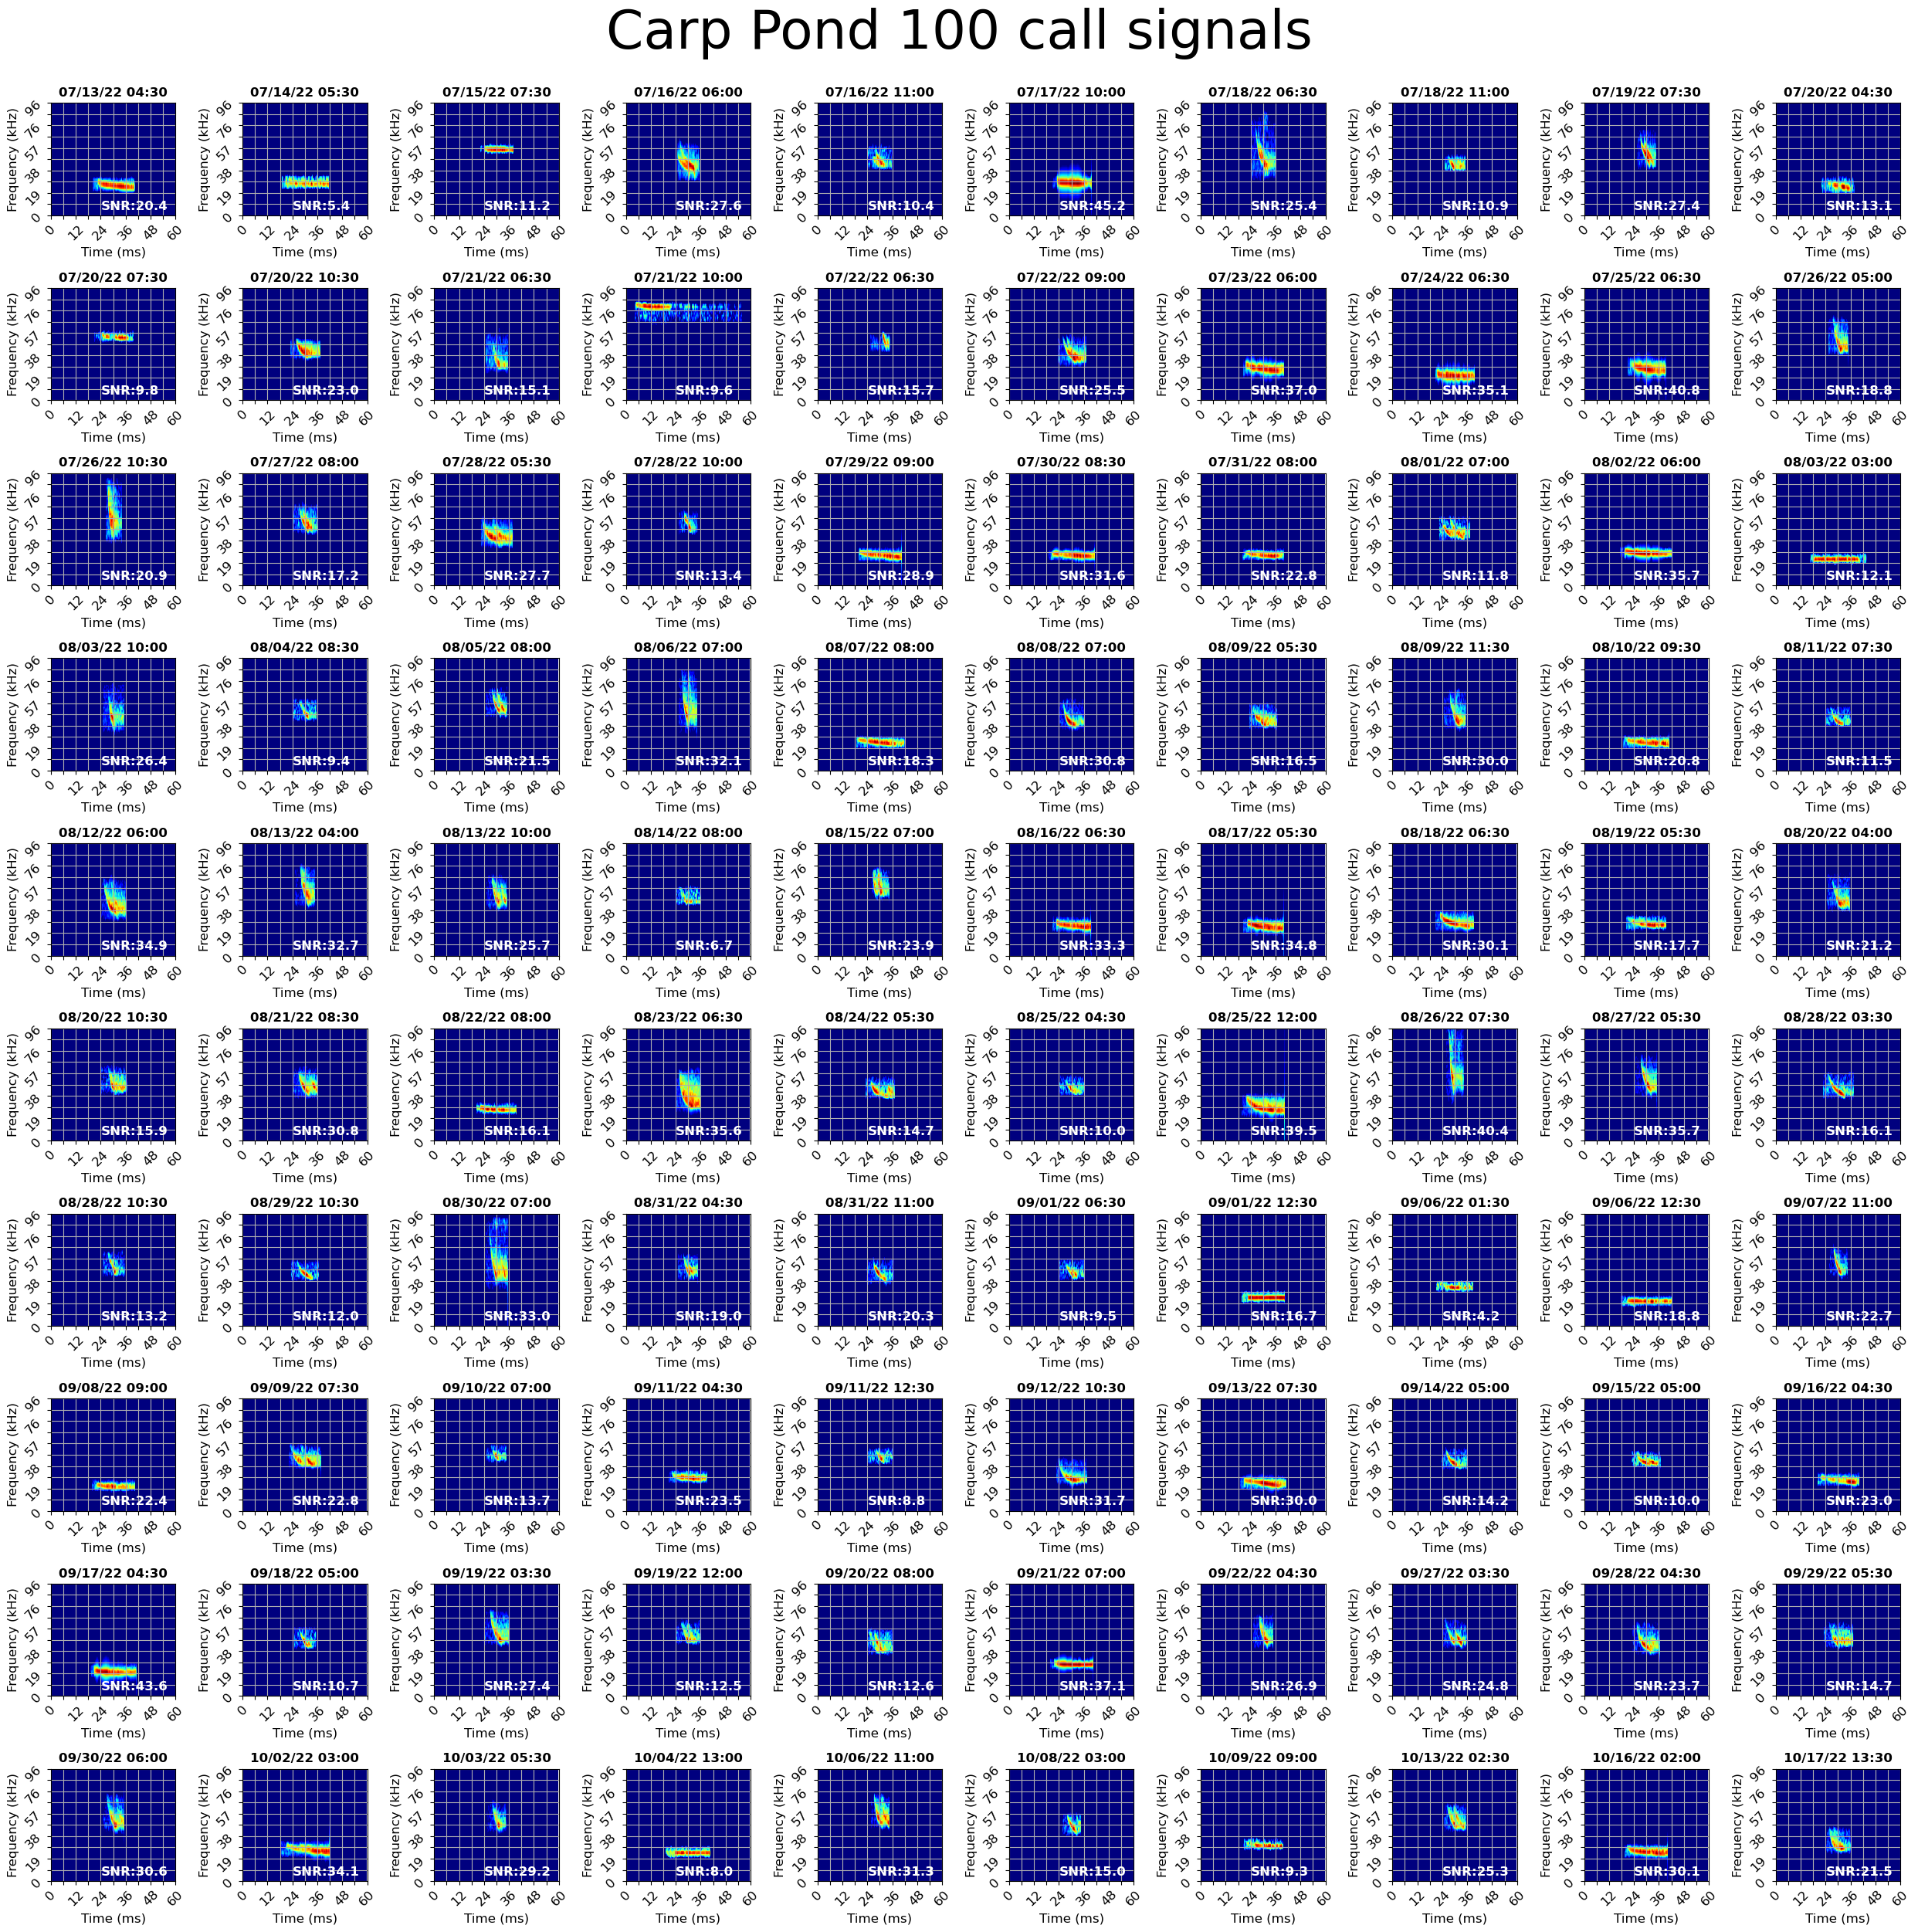

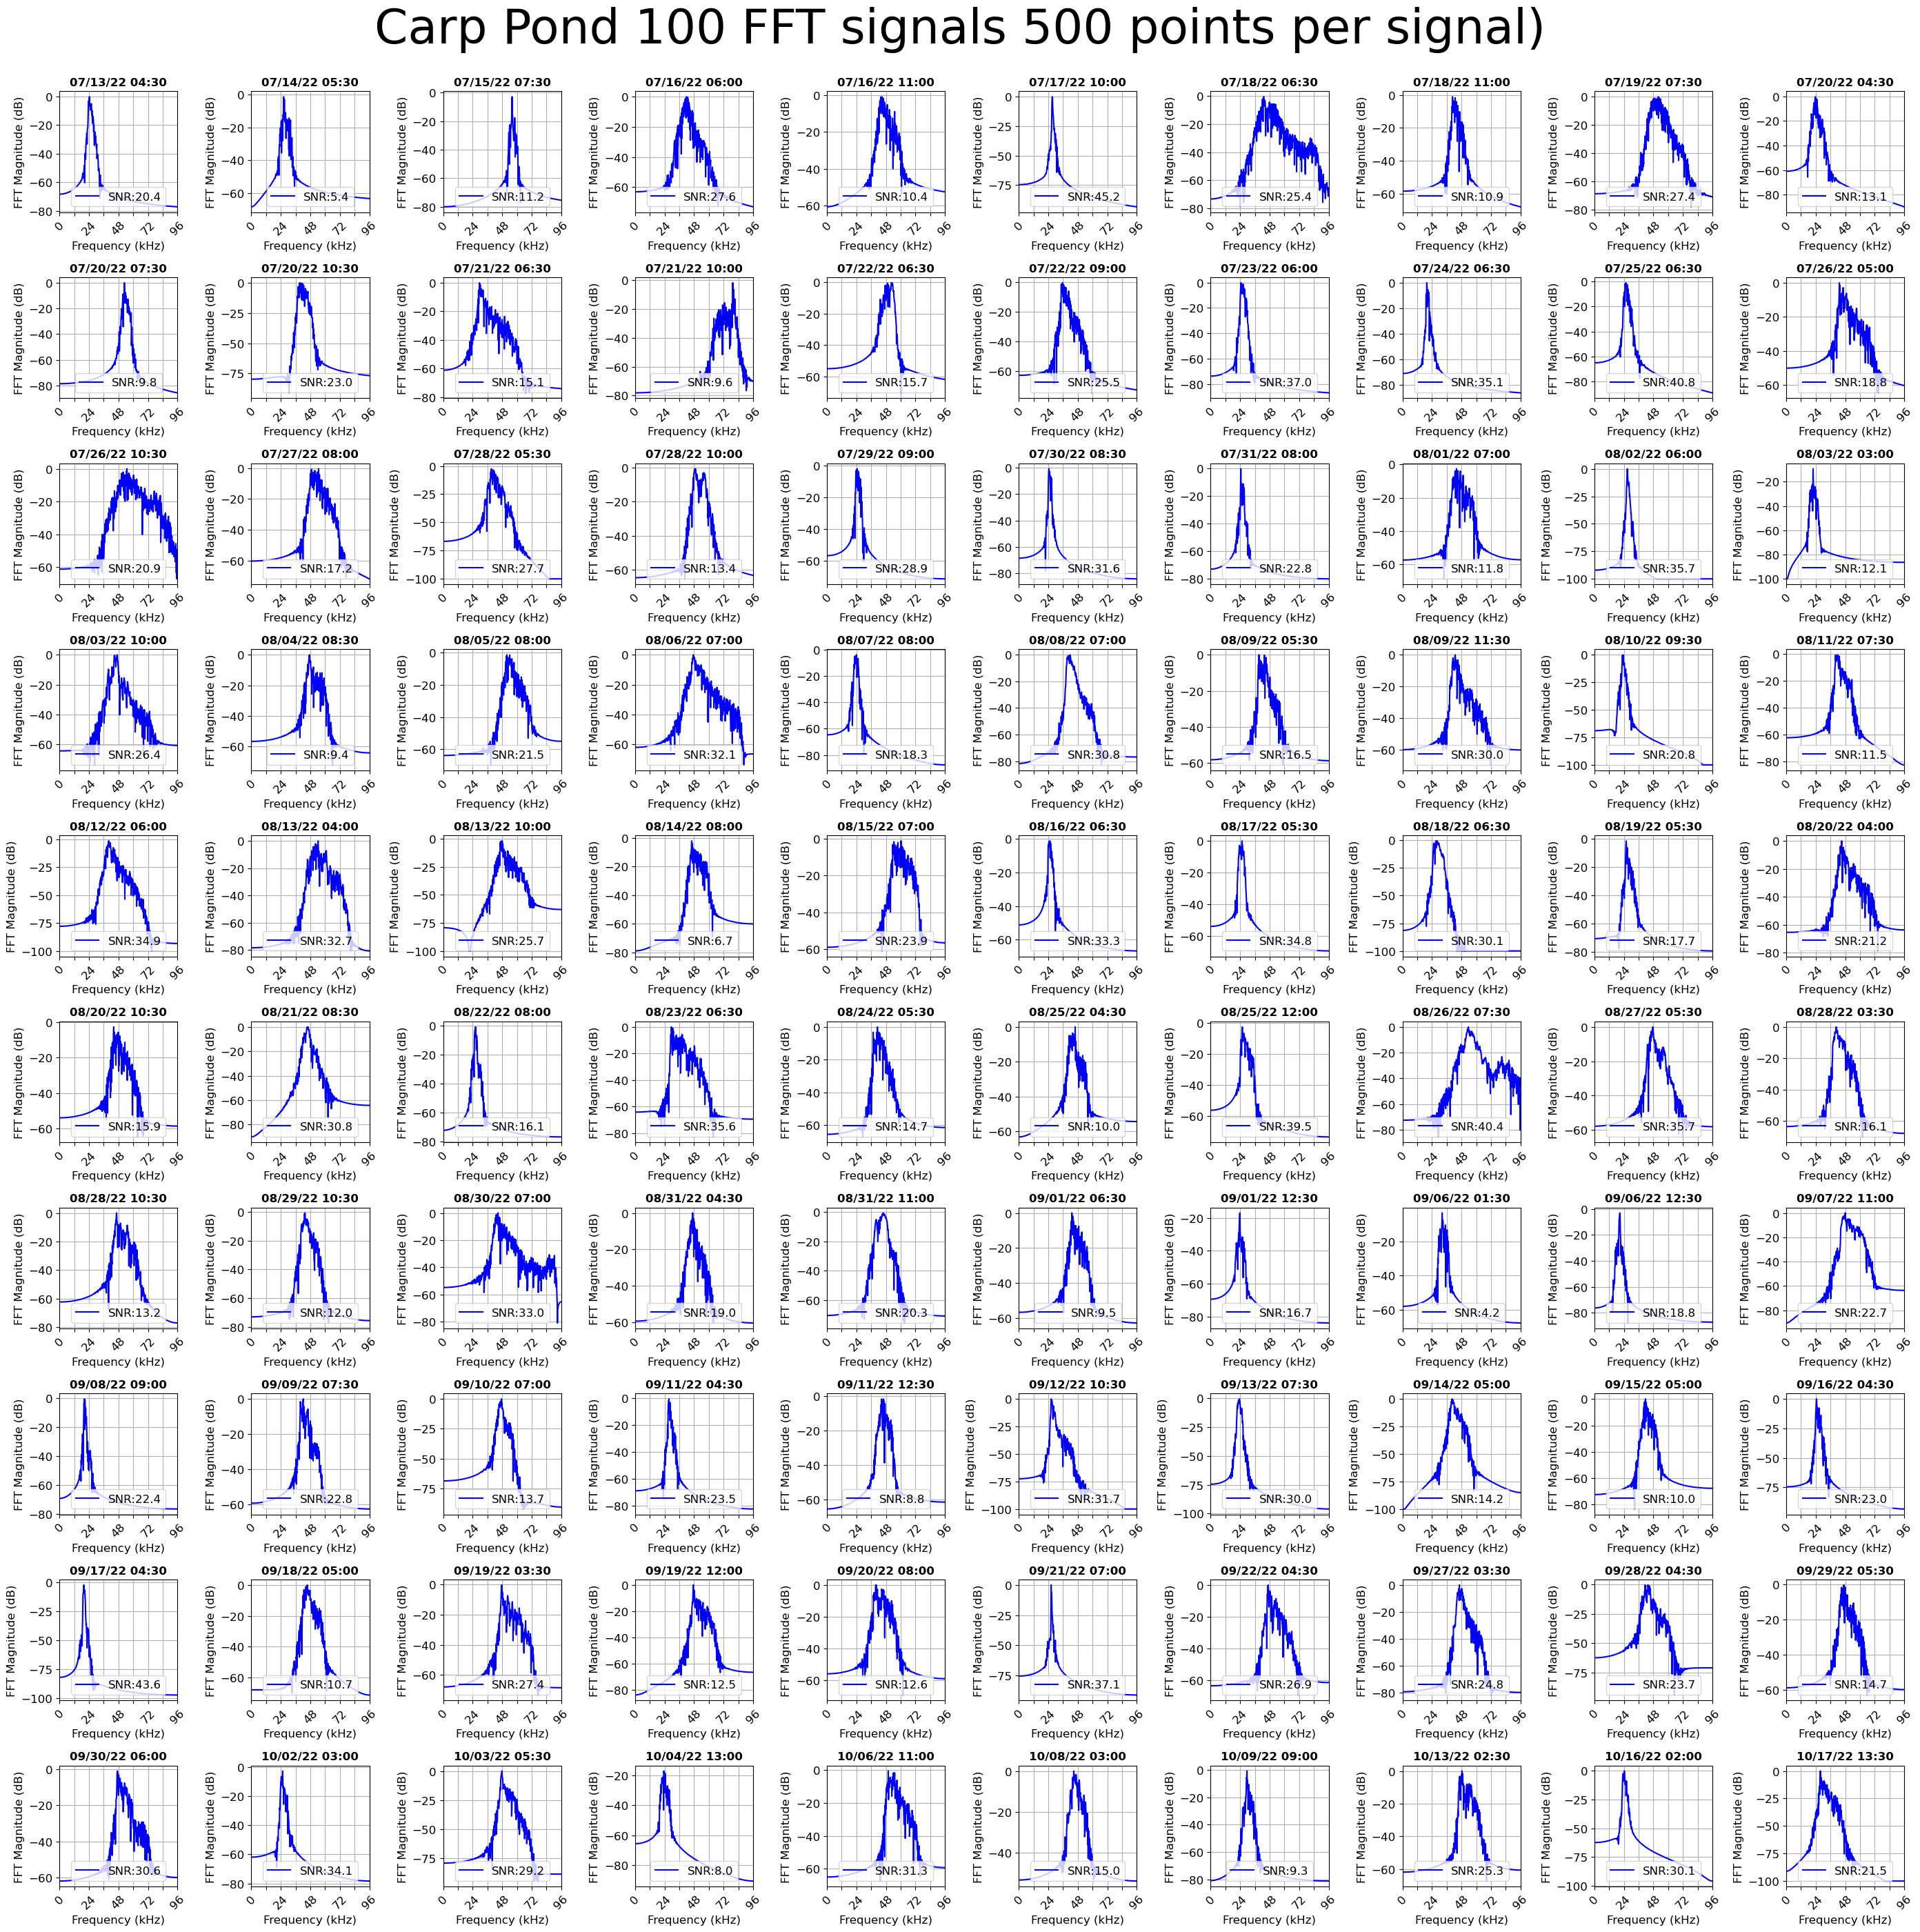

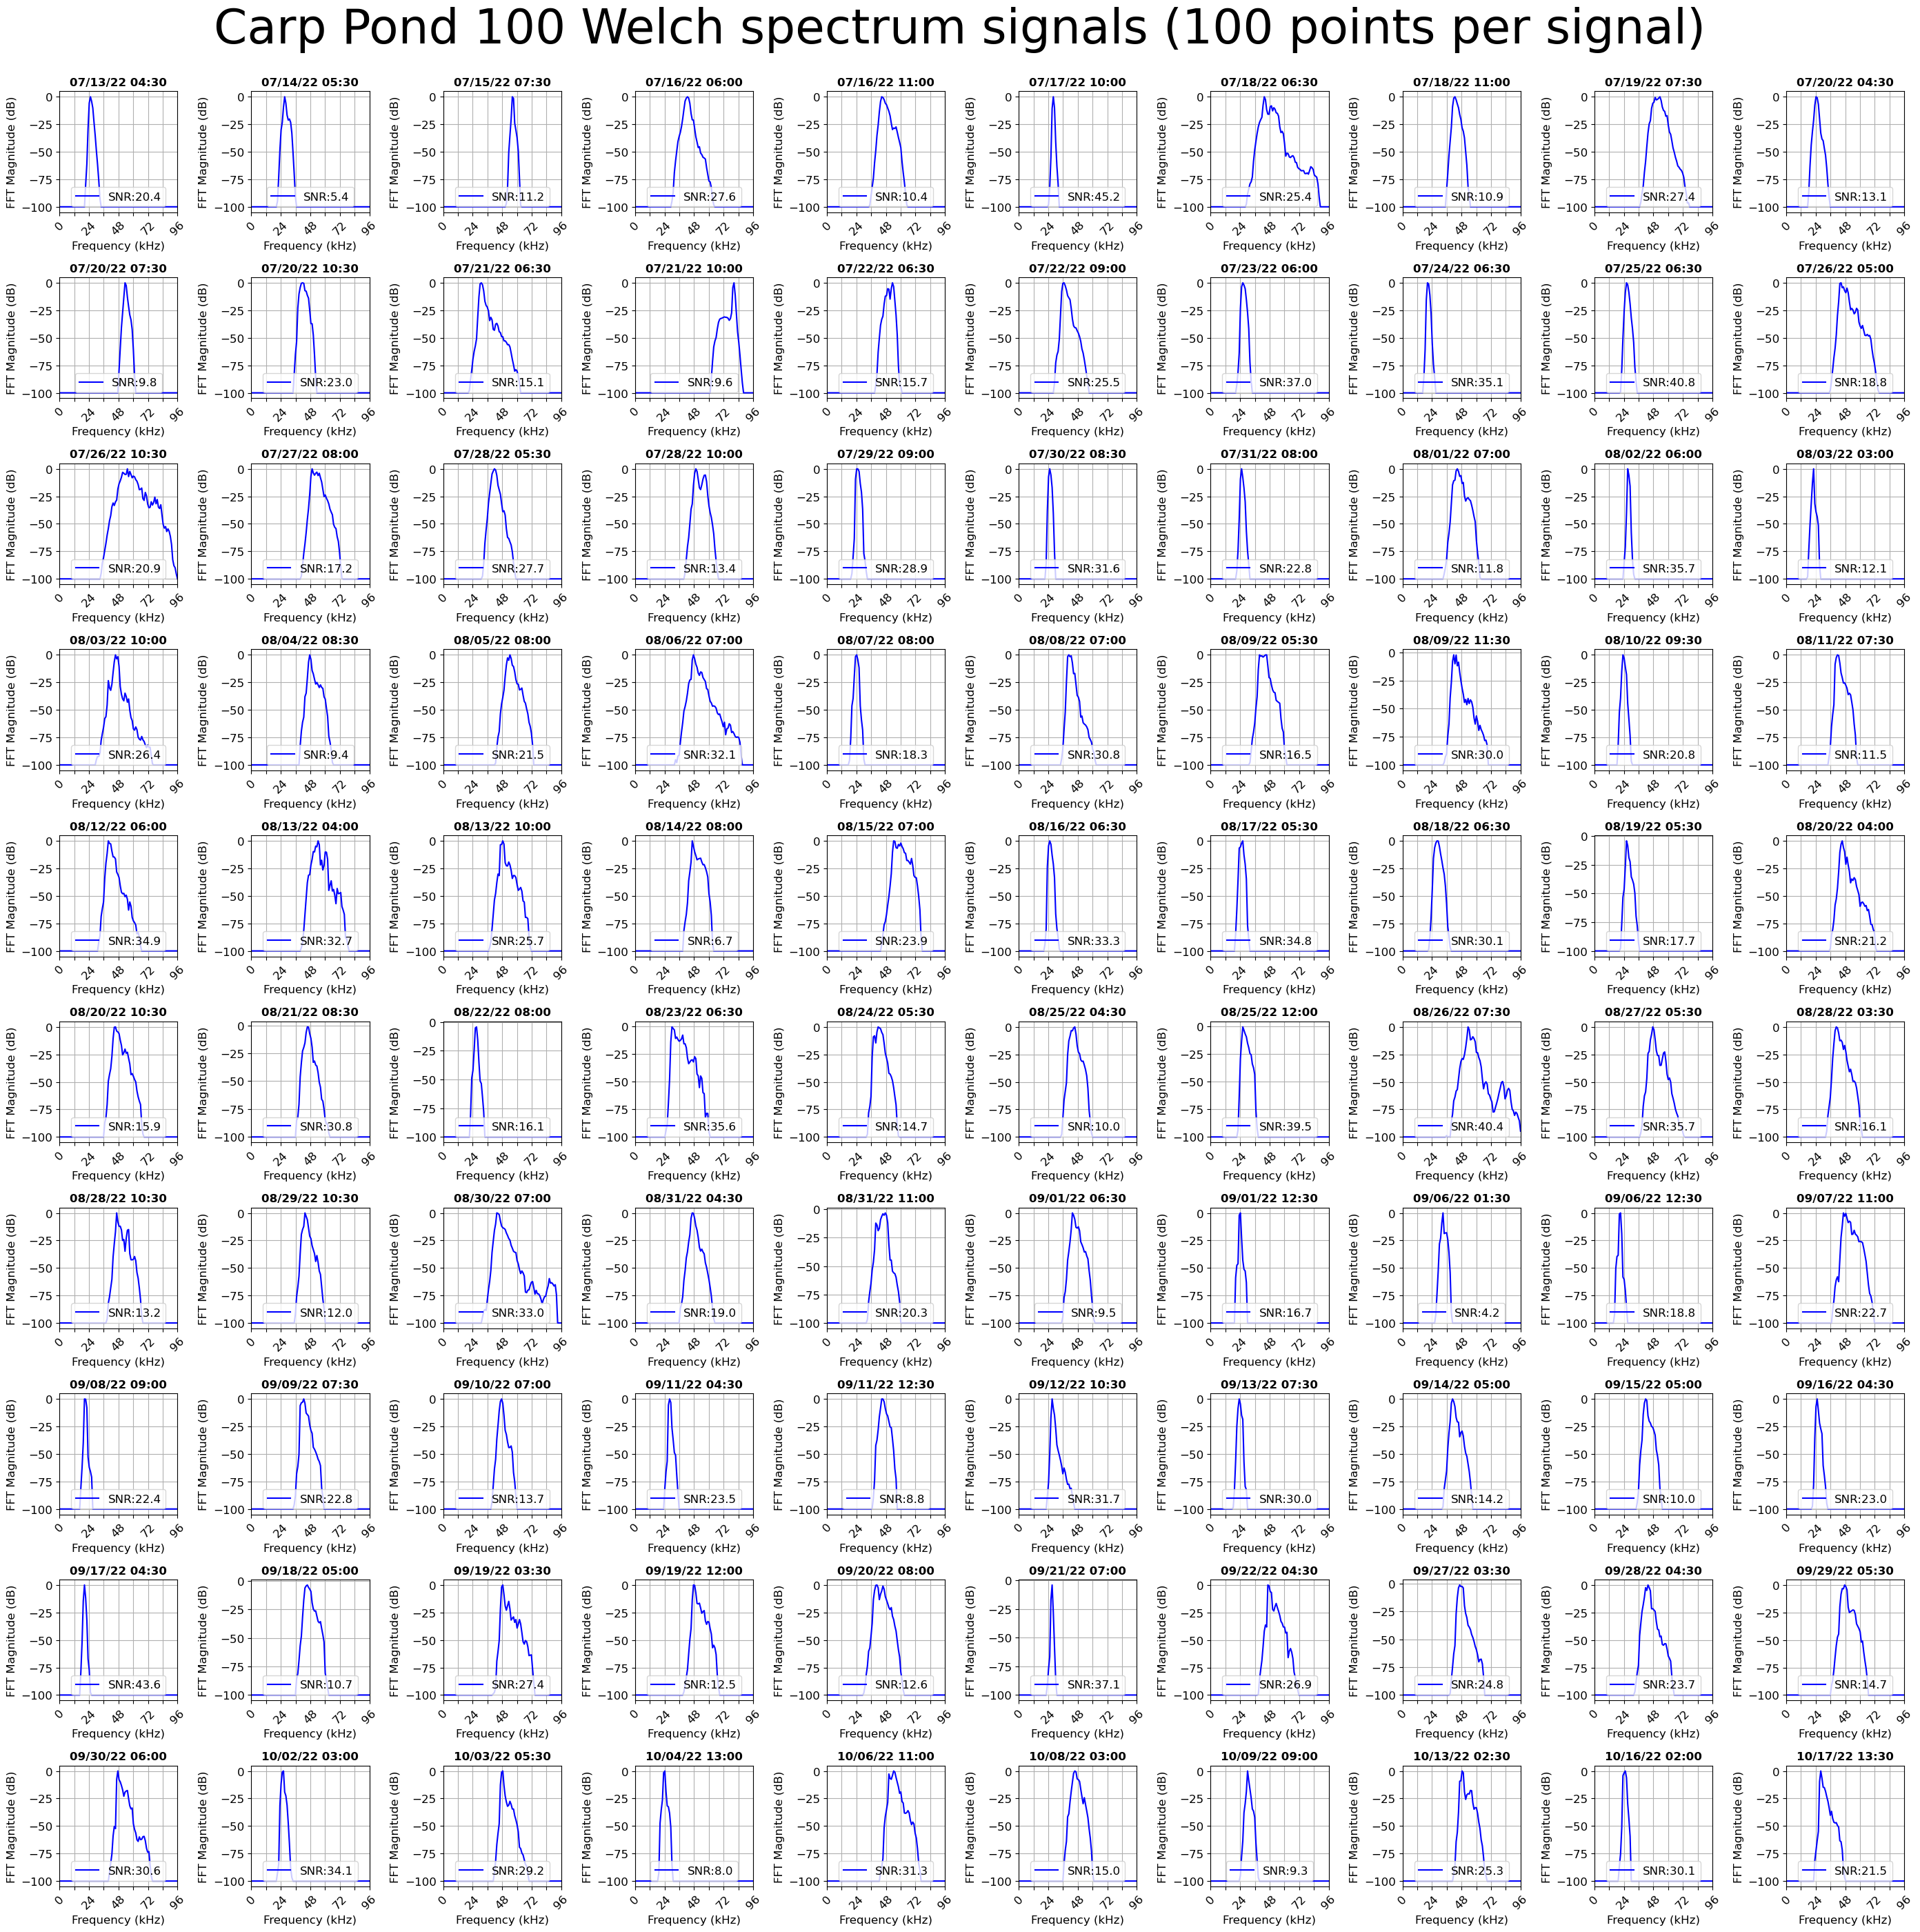

In [6]:
plot_call_features.plot_hundred_calls(good_snr_location_calls_sampled, location_call_signals, site_key)
plot_call_features.plot_hundred_ffts(good_snr_location_calls_sampled, location_call_signals, site_key)
plot_call_features.plot_hundred_welch(good_snr_location_calls_sampled, location_call_signals, site_key)